In [1]:
#!pip install ipywidgets matplotlib plotly  bokeh dask
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import os
from tqdm import tqdm 
import glob
import gzip
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from ipywidgets import Dropdown
from datetime import datetime
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown, display
from statsmodels.tsa.stattools import acf

In [3]:
folder_path = "/gpfs/home5/talkanbar/"

#file_name = "combined_fixed_optimized_df1.pkl" #this is the original file that we worked with
file_path = os.path.join(folder_path, file_name)
merged_df = pd.read_pickle(file_path)

In [27]:
merged_df

,symbol,timestamp,local_timestamp,mid_price,asks_0__price,asks_1__price,asks_2__price,asks_3__price,asks_4__price,asks_0__amount,...,mid_price_usd,moneyness,moneyness_category,mid_price_return,underlying_return,avg_iv,order_book_depth,mid_price_volatility,mid_price_log_return,time_diff_seconds
38,BTC-1JAN25-91000-C,2025-01-01 00:00:00.849,2025-01-01 00:00:01.348545,0.02600,0.0275,0.0340,0.0009,0.0010,0.0011,19.9,...,2428.132187,0.974412,ITM,-0.740648,0.000000,NaN,101.9,0.042301,-1.349571,0 days 00:00:00.000000127
39,BTC-1JAN25-106000-P,2025-01-01 00:00:00.976,2025-01-01 00:00:01.886739,0.13650,0.1815,0.0011,0.0012,0.0016,0.0017,3.9,...,12747.881287,1.135012,ITM,4.250000,0.000015,NaN,169.1,0.061304,1.658228,0 days 00:00:00
40,BTC-1JAN25-90000-C,2025-01-01 00:00:00.976,2025-01-01 00:00:01.147840,0.03650,0.0385,0.0755,0.0017,0.0018,0.0019,0.7,...,3408.774117,0.96369,ITM,-0.732601,0.000000,NaN,68.7,0.055923,-1.319012,0 days 00:00:00
41,BTC-1JAN25-90000-P,2025-01-01 00:00:00.976,2025-01-01 00:00:01.245929,0.00020,0.0003,0.0004,0.0005,0.0007,0.0008,4.4,...,18.678214,0.96369,OTM,-0.994521,0.000000,62.92,143.0,0.056472,-5.206750,0 days 00:00:00
42,BTC-1JAN25-95500-P,2025-01-01 00:00:00.976,2025-01-01 00:00:01.648125,0.02275,0.0245,0.0325,0.0027,0.0028,0.0029,20.0,...,2124.646881,1.022582,ITM,112.750000,0.000000,NaN,69.4,0.053164,4.734003,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688699,BTC-28JAN25-101000-C,2025-01-28 08:00:00.228,2025-01-28 08:00:14.262554,0.02355,0.0001,0.0003,0.0045,0.0050,0.0055,1.1,...,2422.819290,0.981728,ATM,0.000000,0.000000,NaN,12.0,0.000000,0.000000,0 days 00:00:00
10688700,BTC-28JAN25-100500-P,2025-01-28 08:00:00.229,2025-01-28 08:00:14.208382,0.02355,0.0001,0.0003,0.0045,0.0050,0.0055,1.1,...,2422.819290,0.976868,OTM,0.000000,0.000000,NaN,12.0,0.000000,0.000000,0 days 00:00:00
10688701,BTC-28JAN25-100000-P,2025-01-28 08:00:00.230,2025-01-28 08:00:14.325650,0.02355,0.0001,0.0003,0.0045,0.0050,0.0055,1.1,...,2422.819290,0.972008,OTM,0.000000,0.000000,NaN,12.0,0.000000,0.000000,0 days 00:00:00
10688702,BTC-28JAN25-100500-C,2025-01-28 08:00:00.230,2025-01-28 08:00:14.088598,0.02355,0.0001,0.0003,0.0045,0.0050,0.0055,1.1,...,2422.819290,0.976868,ITM,0.000000,0.000000,NaN,12.0,0.000000,0.000000,0 days 00:00:00


overview of the data:

In [16]:
num_rows = merged_df.shape[0]
print("Number of rows:", num_rows)
num_unique_symbols = merged_df['symbol'].nunique()
print("Number of unique symbols:", num_unique_symbols)
print(merged_df.describe())



Number of rows: 10688690
Number of unique symbols: 1698
                           timestamp                local_timestamp  \
count                       10688690                       10688690   
mean   2025-01-16 21:10:46.264214528  2025-01-16 21:10:46.274937344   
min       2024-12-31 23:59:55.984000     2025-01-01 00:00:00.372919   
25%    2025-01-11 04:47:50.128499968  2025-01-11 04:47:50.133049600   
50%    2025-01-18 07:01:06.808999936  2025-01-18 07:01:06.811171584   
75%    2025-01-22 03:48:28.298499840  2025-01-22 03:48:28.304567808   
max       2025-01-28 08:00:00.231000     2025-01-28 08:00:14.328196   
std                              NaN                            NaN   

          mid_price  asks_0__price  asks_1__price  asks_2__price  \
count  1.068869e+07   1.068869e+07   1.068868e+07   1.068868e+07   
mean   2.000549e-02   2.218960e-02   1.917717e-02   1.623455e-02   
min    1.500000e-04   1.000000e-04   2.000000e-04   3.000000e-04   
25%    1.700000e-03   1.800000e-

In [11]:
merged_df.dtypes

symbol                                    object
local_timestamp                   datetime64[ns]
date                              datetime64[ns]
strike                                     Int64
type                                      object
                                       ...      
weighted_mid_price_L1_usd_norm           float64
weighted_mid_price_L2_usd_norm           float64
weighted_mid_price_L3_usd_norm           float64
VWMP_usd_norm                            float64
spread_usd_norm                          float64
Length: 70, dtype: object

In [17]:
print(merged_df['symbol'].value_counts())


symbol
BTC-17JAN25-101000-C    135192
BTC-20JAN25-102000-C     96382
BTC-20JAN25-103000-C     86952
BTC-20JAN25-102500-C     80674
BTC-20JAN25-101000-P     67437
                         ...  
BTC-25JAN25-120000-C        12
BTC-25JAN25-122000-C        10
BTC-3JAN25-145000-P          2
BTC-10JAN25-140000-P         2
BTC-26JAN25-106500-P         2
Name: count, Length: 1698, dtype: int64


how rich is the data for each day? How many symbols each day contains?

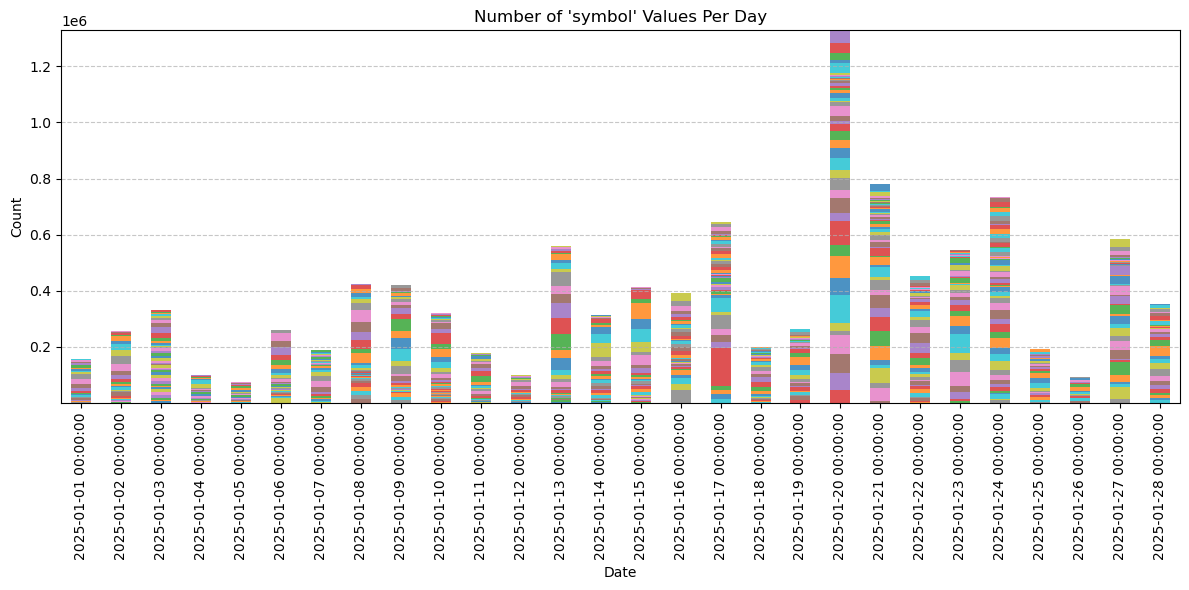

In [32]:
symbol_counts_by_date = merged_df.groupby(['date', 'symbol']).size().reset_index(name='count')
pivot_table = symbol_counts_by_date.pivot(index='date', columns='symbol', values='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8)
plt.title("Number of 'symbol' Values Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().set_visible(False)
plt.tight_layout() 
plt.show()
# eaceh color represents a symbol (we removed them from the graph)

sampleing frequency : how frequant is the data? 

In [60]:
merged_df = merged_df.sort_values('timestamp') 
time_diffs_merged = merged_df['timestamp'].diff().dropna()
print("Sampling frequency (time between consecutive timestamps) in merged_df:")
print(time_diffs_merged.describe())
print("Most common time difference (mode) in merged_df:", time_diffs_merged.mode()[0])

Sampling frequency (time between consecutive timestamps) in merged_df:
count                     10688653
mean     0 days 00:00:00.220944527
std      0 days 00:01:31.540272360
min                0 days 00:00:00
25%         0 days 00:00:00.001000
50%         0 days 00:00:00.004000
75%         0 days 00:00:00.037000
max         0 days 15:59:59.264000
Name: timestamp, dtype: object
Most common time difference (mode) in merged_df: 0 days 00:00:00


# Cleaning

In [ ]:
cols_to_fill = merged_df.columns
def grouped_fillna(df, cols):
    filled_df = df.groupby('symbol', group_keys=False)[cols].apply(lambda group: group.ffill().bfill())
    return filled_df
filled_cols = grouped_fillna(merged_df, cols_to_fill)
merged_df.update(filled_cols)
print(merged_df[cols_to_fill].isna().sum())  

### Adding features

In [ ]:
# Compute mid-price
merged_df["mid_price"] = (merged_df["asks_0__price"] + merged_df["bids_0__price"]) / 2
#type
merged_df['type'] = merged_df['type_P'].apply(lambda x: 'P' if x == 1 else 'C')

In [ ]:
#some timestamp fixes
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='us')
merged_df['local_timestamp'] = pd.to_datetime(merged_df['local_timestamp'], unit='us')
merged_df['date'] = merged_df['timestamp'].dt.date
merged_df['hour'] = merged_df['timestamp'].dt.hour

converting to usd 

The prices in the LOB are in terms of BTC, but since other prices (such as the underlying price) are in USD, we will convert them.
Here we multiply the price of all levels (5 levels bids/asks) by the underlying price at that moment. 

In [13]:
#  ask prices 
merged_df['asks_0__price_usd'] = merged_df['asks_0__price'] * merged_df['underlying_price']
merged_df['asks_1__price_usd'] = merged_df['asks_1__price'] * merged_df['underlying_price']
merged_df['asks_2__price_usd'] = merged_df['asks_2__price'] * merged_df['underlying_price']
merged_df['asks_3__price_usd'] = merged_df['asks_3__price'] * merged_df['underlying_price']
merged_df['asks_4__price_usd'] = merged_df['asks_4__price'] * merged_df['underlying_price']

#  bid prices 
merged_df['bids_0__price_usd'] = merged_df['bids_0__price'] * merged_df['underlying_price']
merged_df['bids_1__price_usd'] = merged_df['bids_1__price'] * merged_df['underlying_price']
merged_df['bids_2__price_usd'] = merged_df['bids_2__price'] * merged_df['underlying_price']
merged_df['bids_3__price_usd'] = merged_df['bids_3__price'] * merged_df['underlying_price']
merged_df['bids_4__price_usd'] = merged_df['bids_4__price'] * merged_df['underlying_price']

#  mid price 
merged_df['mid_price_usd'] = merged_df['mid_price'] * merged_df['underlying_price']

Time to expiry: difference between current timestamp and the expiration time

In [15]:
merged_df['time_to_expiry'] = merged_df['expiration'] - merged_df['timestamp']

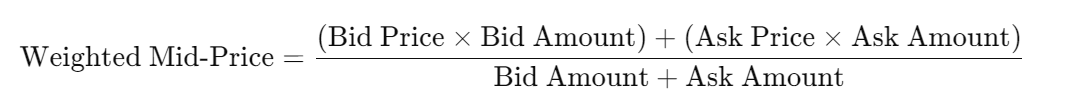

The weighted mid price is a price level between bids and asks, weighted by how much volume (amount) is sitting at each level in the order book.
It’s a more accurate reflection of where the market really is, compared to a simple midpoint between best bid and best ask.


In [24]:
merged_df['weighted_mid_price_L1_usd'] = (
    (merged_df['bids_0__price_usd'] * merged_df['bids_0__amount'] + 
     merged_df['asks_0__price_usd'] * merged_df['asks_0__amount']) / 
    (merged_df['bids_0__amount'] + merged_df['asks_0__amount'])
)

we can also go a level lower : 2nd, 3rd to see differences: compare it with mid-price on that level (unweighted)

Here we will have variations of the mid-price
* weighted mid price: for best bid/ask
* Top N: top 2 levels and top 3 levels
* all levels

In [25]:
def weighted_mid_price(df, levels):
    bid_prices = sum(df[f'bids_{i}__price_usd'] * df[f'bids_{i}__amount'] for i in range(levels))
    ask_prices = sum(df[f'asks_{i}__price_usd'] * df[f'asks_{i}__amount'] for i in range(levels))
    
    bid_sizes = sum(df[f'bids_{i}__amount'] for i in range(levels))
    ask_sizes = sum(df[f'asks_{i}__amount'] for i in range(levels))
    
    total_amount = bid_sizes + ask_sizes
    weighted_mid = (bid_prices + ask_prices) / total_amount
    
    return weighted_mid

# Top-2 Weighted Mid Price (L2)
merged_df['weighted_mid_price_L2_usd'] = weighted_mid_price(merged_df, levels=2)

# Top-3 Weighted Mid Price (L3)
merged_df['weighted_mid_price_L3_usd'] = weighted_mid_price(merged_df, levels=3)

#  VWMP (Volume Weighted Mid Price) using all available levels
max_levels = 5 
merged_df['VWMP_usd'] = weighted_mid_price(merged_df, levels=max_levels)

merged_df[['weighted_mid_price_L2_usd', 'weighted_mid_price_L3_usd', 'VWMP_usd']].head()


,weighted_mid_price_L2_usd,weighted_mid_price_L3_usd,VWMP_usd
38,2498.705085,2093.873503,1199.008265
39,1894.213819,1402.073933,685.444074
40,6013.007116,3164.871388,639.477351
41,83.814375,73.865033,70.474339
42,2137.152916,1924.903138,1578.026516


LOB imbalance :the difference between the weighted avg mid-price and the mid-price.
* If the weighted mid-price is higher than the normal mid-price : More buying pressure (larger ask sizes, demand is higher).
* If the weighted mid-price is lower than the normal mid-price : More selling pressure (larger bid sizes, supply is higher).
* If the difference is close to zero:The order book is balanced,   no strong buying/selling pressure.ing pressure.

In [28]:
merged_df['imbalance_L1_usd'] = merged_df['weighted_mid_price_L1_usd'] - merged_df['mid_price_usd']
merged_df['imbalance_L1_pct'] = merged_df['imbalance_L1_usd'] / merged_df['mid_price_usd']
#smoothed version
merged_df['imbalance_L1_rolling_mean'] = merged_df['imbalance_L1_usd'].rolling(window=10).mean()


In [29]:
# Imbalances at different depths
merged_df['imbalance_L2_usd'] = merged_df['weighted_mid_price_L2_usd'] - merged_df['mid_price_usd']
merged_df['imbalance_L3_usd'] = merged_df['weighted_mid_price_L3_usd'] - merged_df['mid_price_usd']
merged_df['imbalance_VWMP_usd'] = merged_df['VWMP_usd'] - merged_df['mid_price_usd']

# Spread Features
merged_df['spread_usd'] = merged_df['asks_0__price_usd'] - merged_df['bids_0__price_usd']
merged_df['relative_spread'] = merged_df['spread_usd'] / merged_df['mid_price_usd']

# Depth Ratio (Liquidity Balance)
merged_df['depth_ratio'] = (merged_df['bids_0__amount'] - merged_df['asks_0__amount']) / \
                           (merged_df['bids_0__amount'] + merged_df['asks_0__amount'])

# Price Impact Ratio (Difference between VWMP and Top-2 Weighted Mid Price)
merged_df['price_impact_ratio'] = (merged_df['VWMP_usd'] - merged_df['weighted_mid_price_L2_usd']) / merged_df['VWMP_usd']

The order_book_depth refers to the total liquidity available in the order book across multiple levels. It is calculated by summing the quantity (amount) of orders at the top 5 levels of both the bid (buy) and ask (sell) sides of the order book.

Bid side: The sum of all the orders where people are willing to buy the asset, starting from the highest price (bids_0__amount) to the 5th level (bids_4__amount).

Ask side: The sum of all the orders where people are willing to sell the asset, starting from the lowest price (asks_0__amount) to the 5th level (asks_4__amount).

**Interpreting order_book_depth**:

High order book depth indicates that there are a large number of buy and sell orders at various price levels. This typically signals high liquidity in the market, where it's easier to execute large trades without causing major price moves.

Low order book depth suggests that the market has low liquidity, meaning that only a few orders are present at the top levels, and executing a trade might lead to larger price movements (higher slippage).

In [30]:
merged_df['total_bid_depth'] = sum([merged_df[f'bids_{i}__amount'] for i in range(5)])
merged_df['total_ask_depth'] = sum([merged_df[f'asks_{i}__amount'] for i in range(5)])
merged_df['order_book_depth'] = merged_df['total_bid_depth'] + merged_df['total_ask_depth']

## **Moneyness**: In The Money / Out The Money / At The Money? 

Moneyness is a fundamental concept in options trading, as it defines an option's intrinsic value and influences its price sensitivity to the underlying asset's movements. Understanding how options are distributed across moneyness categories (OTM, ITM, ATM), how their mid-prices vary, and how they respond to market dynamics is crucial for understanding the dataset and for choosing predictors. In this section, we aim to investigate the prevalence of each moneyness category, assess whether intraday price movements of the underlying asset cause shifts in moneyness, and analyze how mid-price distributions and key features like gamma, bid volume, and open interest differ across categories. 



how to determine options moneyness?

For ***Call*** Options
- **In the Money (ITM)**: The strike price is below the current market price of the underlying asset 
- **At the Money (ATM)**: The strike price is approximately equal to the market price 
- **Out of the Money (OTM)**: The strike price is above the market price 

For ***Put*** Options :
- **In the Money (ITM)**: The strike price is above the current market price of the underlying asset 
- **At the Money (ATM)**: The strike price is approximately equal to the market price 
- **Out of the Money (OTM)**: The strike price is below the market price


In [13]:
# we  calculate moneyness as a ratio of strike price to underlying price for each option and use that as moneyness attribute,
#without specifying category,  because it changes per second
merged_df['moneyness'] = merged_df['strike'] / merged_df['underlying_price']

In [ ]:
#here we also determine the category based on the rules mentioned above, for the purpose of EDA. We ended up not useing categorry but the ratio.
# for ATM, the strike should be equal to underlying, but this is very rare . so we add a threshold (2%), we call options that are within this threshold ATM
atm_threshold = 0.02
# now we classify options
merged_df['moneyness_category'] = np.where(
    ((merged_df['type'] == 'C') & (merged_df['moneyness'] < 1 - atm_threshold)) | 
    ((merged_df['type'] == 'P') & (merged_df['moneyness'] > 1 + atm_threshold)), 'ITM',
    np.where(
        ((merged_df['moneyness'] >= 1 - atm_threshold) & (merged_df['moneyness'] <= 1 + atm_threshold)), 
        'ATM', 
        'OTM'
    )
)

In [ ]:
merged_df['time_to_expiry_seconds'] = merged_df['time_to_expiry'].dt.total_seconds()
merged_df['time_to_expiry_min']=merged_df['time_to_expiry_seconds'] /60

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['type'], prefix='type', dtype=int)

# EDA

## Understanding some features

**Underlying price for the whole period**

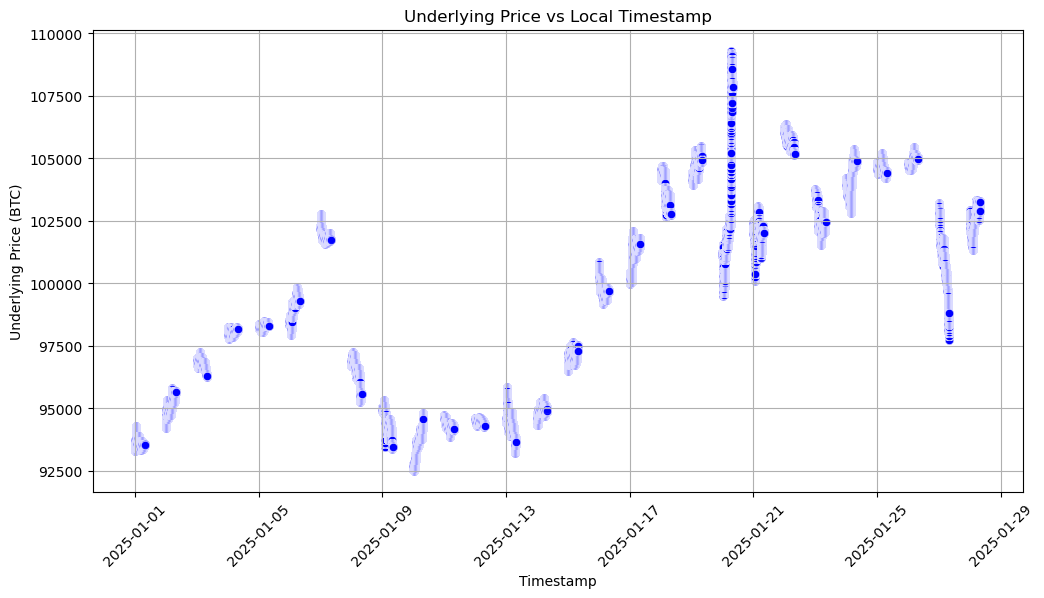

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='timestamp', y='underlying_price', color='blue', alpha=0.6)
plt.xlabel("Timestamp")
plt.ylabel("Underlying Price (BTC)")
plt.title("Underlying Price vs Local Timestamp")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

the reason we see some gaps is that each day: only 8 hours are covered (options expire at 8:00 am each day)  and when we merged, we merged based on timestamp and symbol (we took only 0dte options)

now we plot the normalized mid price: mid_price/underlying for both C and P options

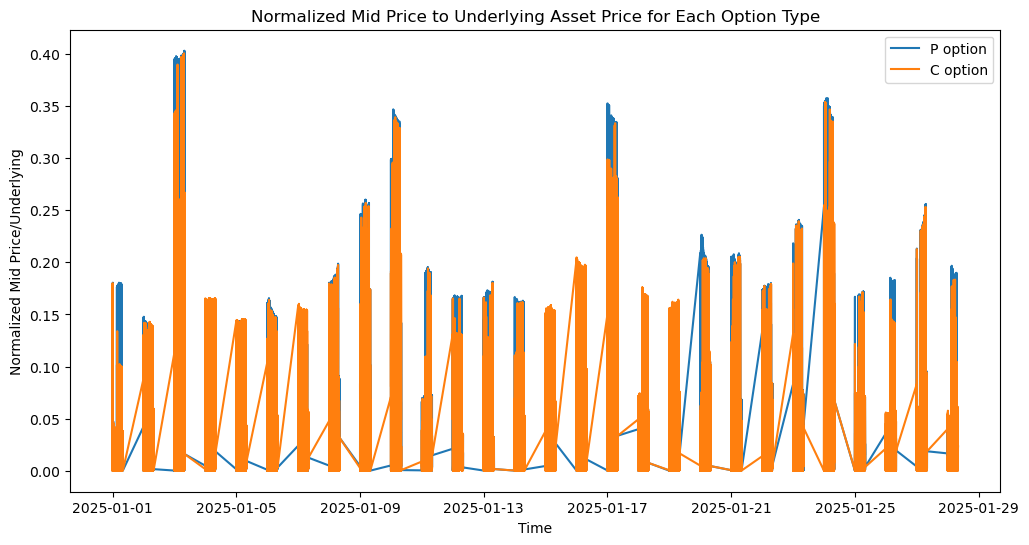

In [12]:
plt.figure(figsize=(12, 6))
for option_type in merged_df['type'].unique():
    option_data = merged_df[merged_df['type'] == option_type]
    plt.plot(option_data['timestamp'], option_data['mid_price_usd_norm'], label=f"{option_type} option")

plt.title('Normalized Mid Price to Underlying Asset Price for Each Option Type')
plt.xlabel('Time')
plt.ylabel('Normalized Mid Price/Underlying')
plt.legend()
plt.show()


there seems to be some seasonality: some days options are more expensive than others (relative to their strike or compared to their underlying)

### Visualizing individual options

The data consists of many options, each option is a timeseries on its own. We can explore each option individually , either by selecting the symbol, or by selecting features that distinguish between options (date, strike, type)

Visulalizing mid price with underlying

In [4]:
#because we have many symbols, each is a timeseries, we should select the options charactaristics (date, expiry and type)
#then visualize one or more of its features. This function does that:

def plot_option_data(date, option_type, strike, merged_df):
    
    filtered_df = merged_df[(merged_df['date'] == date) & 
                            (merged_df['type'] == option_type) & 
                            (merged_df['strike'] == strike)]
    
    if not filtered_df.empty:
        start_time = filtered_df['timestamp'].min()  
        end_time = start_time + pd.Timedelta(hours=10)  
        filtered_df = filtered_df[(filtered_df['timestamp'] >= start_time) & 
                                 (filtered_df['timestamp'] <= end_time)]

    if filtered_df.empty:
        print("No data available for the selected date, type, and strike.")
        return

    fig, ax = plt.subplots(figsize=(8, 6))

    color = 'blue'
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Mid Price (Normalized)', color=color)
    ax.plot(filtered_df['timestamp'], filtered_df['mid_price_usd_norm'], 
            color=color, label='Mid Price (Normalized)')
    ax.tick_params(axis='y', labelcolor=color)
    

    ax2 = ax.twinx()
    color = 'orange'
    ax2.set_ylabel('Underlying Price', color=color)
    ax2.plot(filtered_df['timestamp'], filtered_df['underlying_price'], 
             color=color, label='Underlying Price')
    ax2.tick_params(axis='y', labelcolor=color)
    

    plt.title(f'Mid Price (Normalized) vs Underlying Price for {option_type} {strike} on {date}')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()

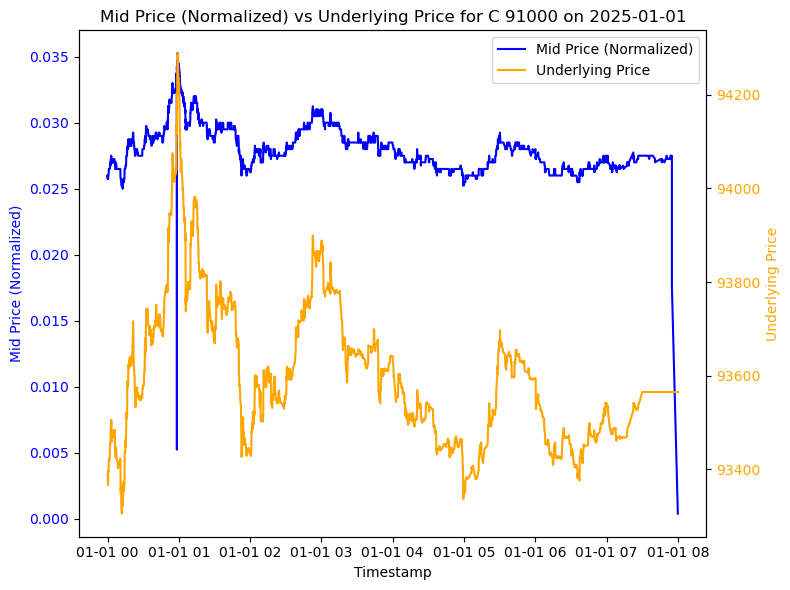

In [5]:
plot_option_data(date='2025-01-01', option_type='C', strike=91000, merged_df=merged_df)

In [ ]:
plot_option_data(date='2025-01-20', option_type='P', strike=105500, merged_df=merged_df, 
              timestamp_col='timestamp_fixed')


In [ ]:
plot_option_data(date='2025-01-20', option_type='P', strike=105500, merged_df=merged_df, 
              timestamp_col='timestamp')

In [ ]:
plot_option_data(date='2025-01-01', option_type='C', strike=91000, merged_df=merged_df, 
              timestamp_col='timestamp_fixed')

Exploring individual options is  helpful to gain an inderstanding of the option's features over time. But since we have 1698 options, we need to use a different approach to understand the dataset. We will try to study some features, their distribution, their interaction with mid-price,etc.  

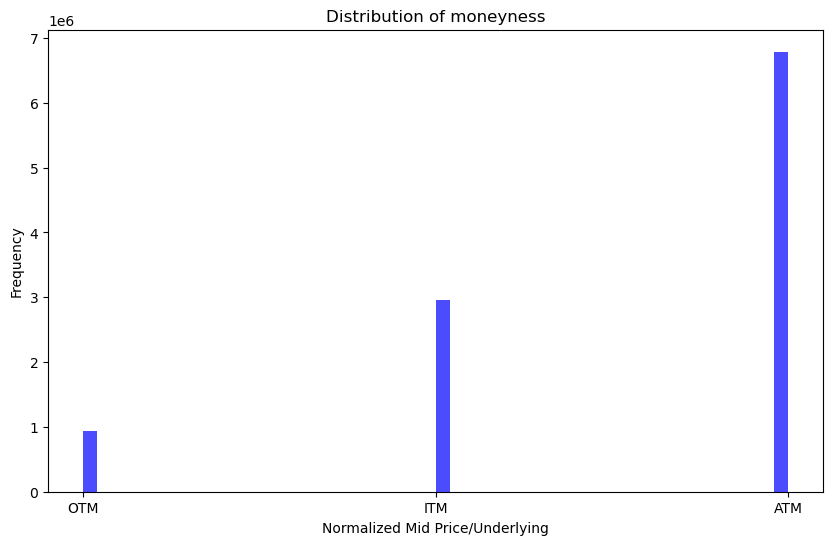

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['moneyness_category'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of moneyness')
plt.xlabel('Normalized Mid Price/Underlying')
plt.ylabel('Frequency')
plt.show()

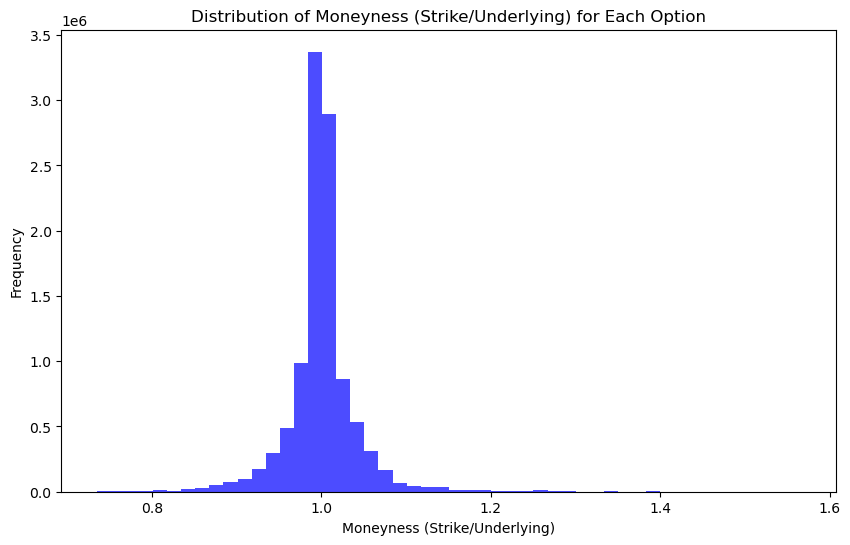

In [16]:
# distribution of moneyness as ratio
plt.figure(figsize=(10, 6))
plt.hist(merged_df['moneyness'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Moneyness (Strike/Underlying) for Each Option')
plt.xlabel('Moneyness (Strike/Underlying)')
plt.ylabel('Frequency')
plt.show()

The peak at 1 indicates a significant portion of options are ATM, meaning their strike prices are very close to the underlying asset's price.
The rest of the options are spread out, but fewer options are deeply in-the-money (ITM) or out-of-the-money (OTM).
The distribution around 1 is typical because, close to expiration, many options are likely to be near ATM, which is common in markets that experience a high level of activity close to the expiration date (0DTE).

Could that be because most of options start the day as ITM or OTM then convert to ATM? 

Because moneyness is determined at each timestamp, (based on the underlying price)  is also possible that some optiosn started either as ITM or OTM, and they changed to ATM during the day. Lets examine that

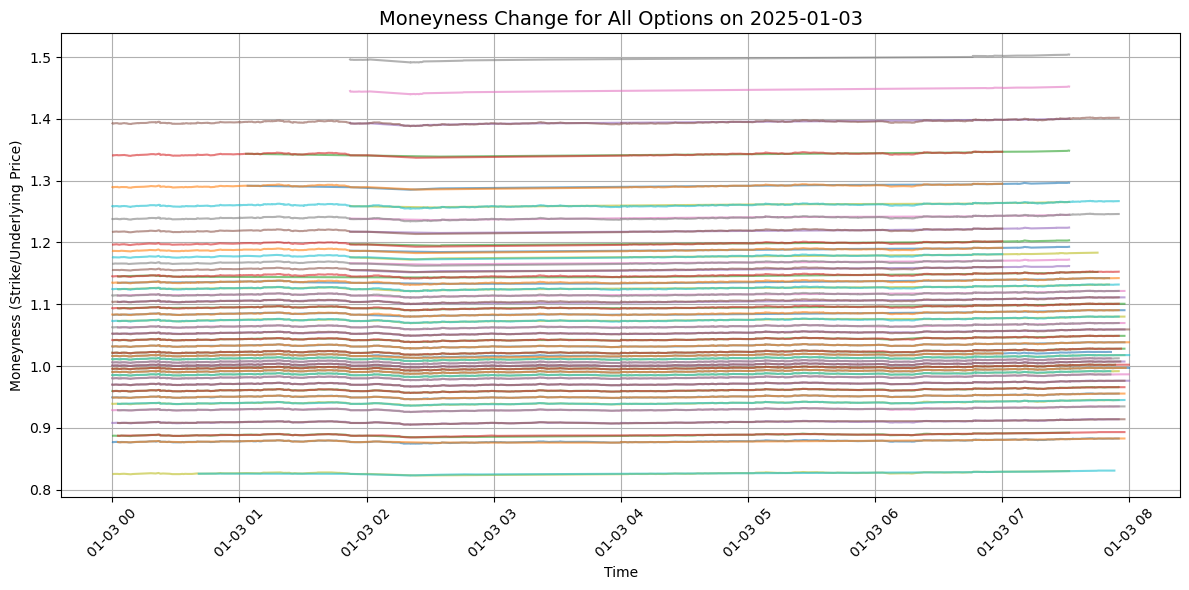

In [3]:

specific_day = '2025-01-03'  
day_data = merged_df[merged_df['date'] == specific_day]
start_time = pd.to_datetime(f'{specific_day} 08:00:00')
first_8_hours_data = day_data[day_data['timestamp'] < start_time]
plt.figure(figsize=(12, 6))
for symbol in first_8_hours_data['symbol'].unique():
    symbol_data = first_8_hours_data[first_8_hours_data['symbol'] == symbol]
    plt.plot(symbol_data['timestamp'], symbol_data['moneyness'], alpha=0.6, label=symbol)
plt.title(f'Moneyness Change for All Options on {specific_day}', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Moneyness (Strike/Underlying Price)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Moneyness category  for most options stay in their moneyness range without drastic changes during the day.  We tried many days. unless the day saw a dramatic change in the underlying (Example : 20 January) then we see changes in the moneyness

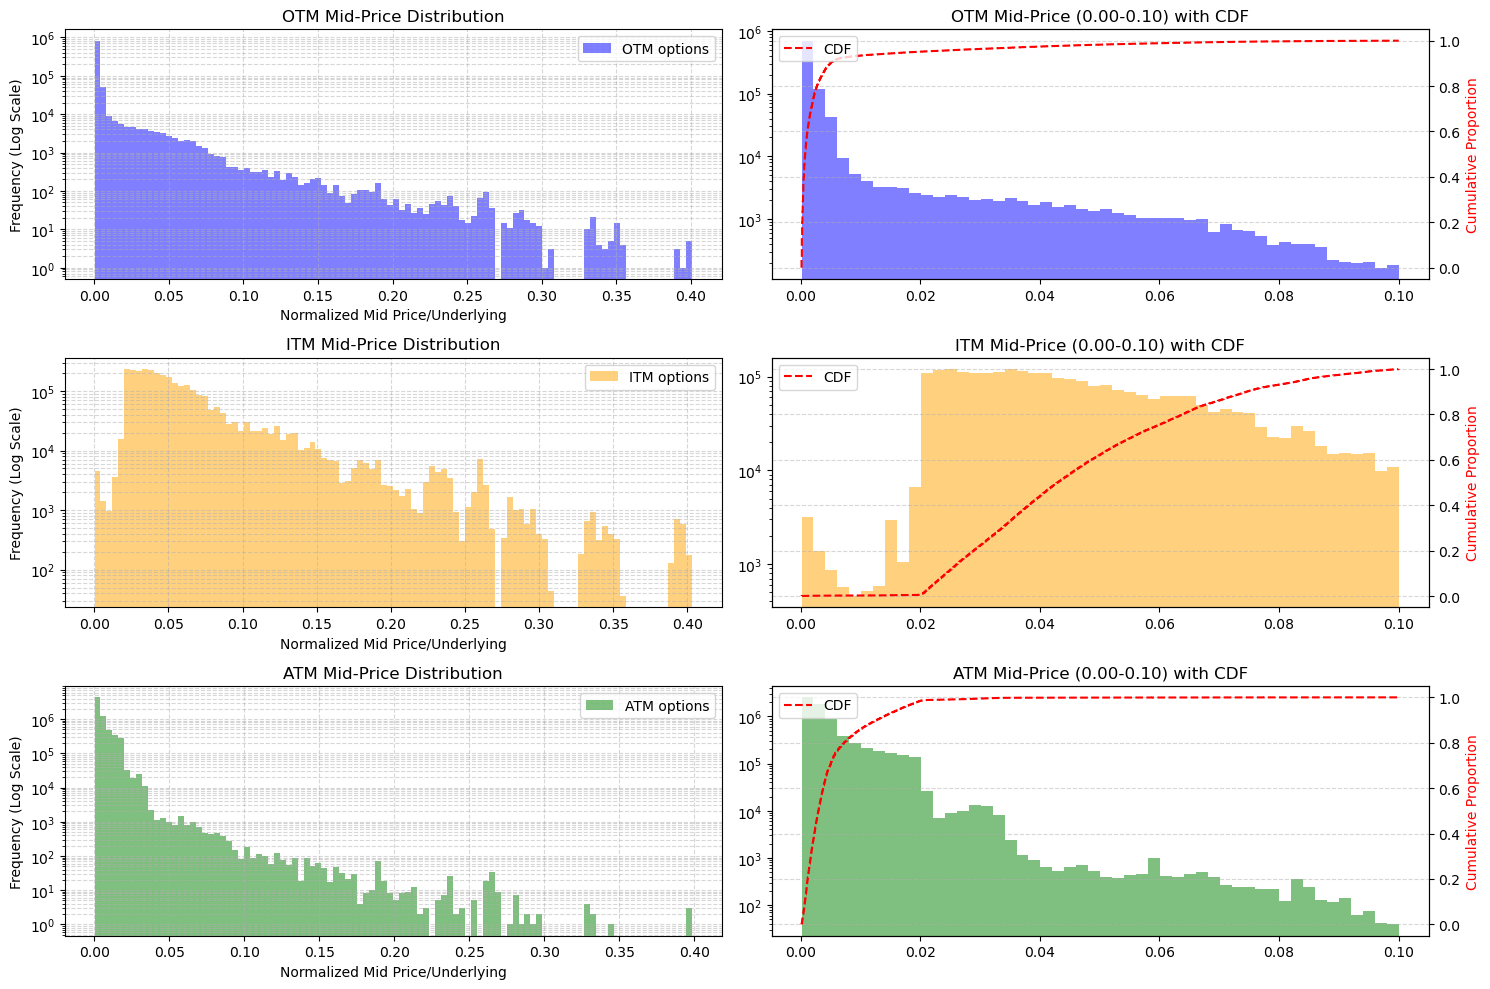

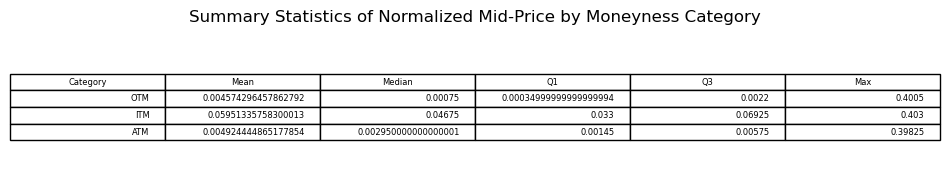

In [35]:

# Plot mid-price distribution for each moneyness category 
plt.figure(figsize=(15, 10))


moneyness_categories = ['OTM', 'ITM', 'ATM']
colors = {'OTM': 'blue', 'ITM': 'orange', 'ATM': 'green'}


for i, moneyness_category in enumerate(moneyness_categories, 1):
    category_data = merged_df[merged_df['moneyness_category'] == moneyness_category]
    mid_prices = category_data['mid_price/underlying']
    
  
    plt.subplot(3, 2, 2*i-1)
    plt.hist(mid_prices, bins=100, alpha=0.5, color=colors[moneyness_category], label=f"{moneyness_category} options")
    plt.yscale('log')  
    plt.title(f'{moneyness_category} Mid-Price Distribution')
    plt.xlabel('Normalized Mid Price/Underlying')
    plt.ylabel('Frequency (Log Scale)')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    
   
    plt.subplot(3, 2, 2*i)
    plt.hist(mid_prices[mid_prices <= 0.10], bins=50, alpha=0.5, color=colors[moneyness_category], label=f"{moneyness_category} options")
    plt.yscale('log')  # Logarithmic scale for frequency
    
    # Overlay CDF
    sorted_mid_prices = np.sort(mid_prices[mid_prices <= 0.10])
    cdf = np.arange(1, len(sorted_mid_prices) + 1) / len(sorted_mid_prices)
    plt.twinx()
    plt.plot(sorted_mid_prices, cdf, color='red', label='CDF', linestyle='--')
    plt.ylabel('Cumulative Proportion', color='red')
    plt.title(f'{moneyness_category} Mid-Price (0.00-0.10) with CDF')
    plt.xlabel('Normalized Mid Price/Underlying')
    plt.legend(loc='upper left')
    plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()

plt.figure(figsize=(12, 2))
stats = []
for moneyness_category in moneyness_categories:
    category_data = merged_df[merged_df['moneyness_category'] == moneyness_category]
    mid_prices = category_data['mid_price/underlying']
    stats.append({
        'Category': moneyness_category,
        'Mean': mid_prices.mean(),
        'Median': mid_prices.median(),
        'Q1': mid_prices.quantile(0.25),
        'Q3': mid_prices.quantile(0.75),
        'Max': mid_prices.max()
    })

stats_df = pd.DataFrame(stats)
plt.table(cellText=stats_df.values, colLabels=stats_df.columns, loc='center')
plt.axis('off')
plt.title('Summary Statistics of Normalized Mid-Price by Moneyness Category')
plt.show()

conclusion:
OTM options are the most concentrated at the lower end (90% ≤ 0.01), reflecting their lack of intrinsic value, with a small tail of higher mid-prices driven by elevated IV.

ITM options have the widest spread (90% ≤ 0.07), driven by intrinsic value.

ATM options fall in between (90% ≤ 0.02), with a moderate spread driven by higher time value (high gamma) but no intrinsic value.



let's study moneyness further, how each monyness category differ regarding some features (gamma, open interst, bid volume)

/scratch-local/talkanbar.10704240/ipykernel_2524174/2310721250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='moneyness_category', y='gamma', palette="coolwarm")


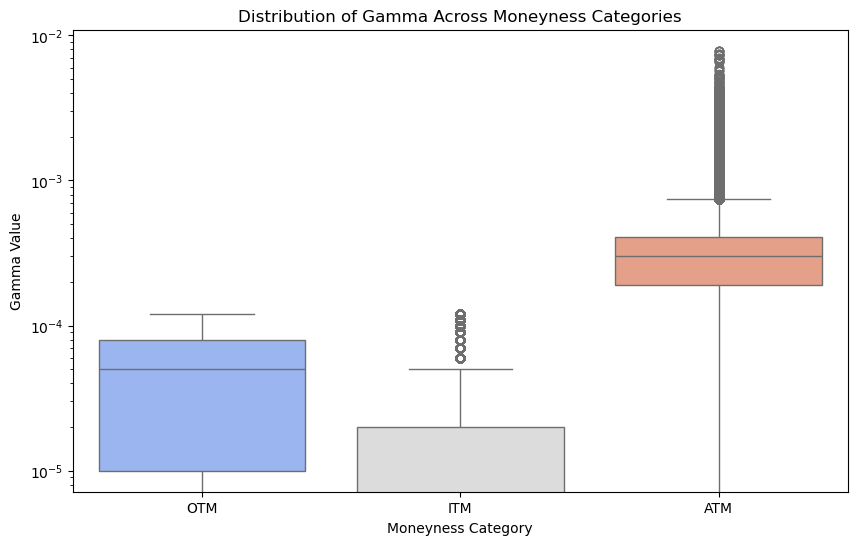

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='moneyness_category', y='gamma', palette="coolwarm")
plt.title('Distribution of Gamma Across Moneyness Categories')
plt.xlabel('Moneyness Category')
plt.ylabel('Gamma Value')
plt.yscale('log')  
plt.show()

 ATM options have significantly higher Gamma values compared to both OTM and ITM. High gamma means that their price is much more sensitive to changes in the underlying asset's price.

With 0DTE options, time decay is extremely rapid. ATM options, due to their high Gamma, experience the most dramatic price swings with even small movements in the underlying. This makes them attractive to traders seeking quick profits from short-term volatility.
Hedging Activity: Market makers, who often take the opposite side of retail trades, also need to hedge their positions. The high Gamma of ATM options requires more frequent and larger hedging adjustments, further contributing to the trading volume and price volatility around the ATM strike.

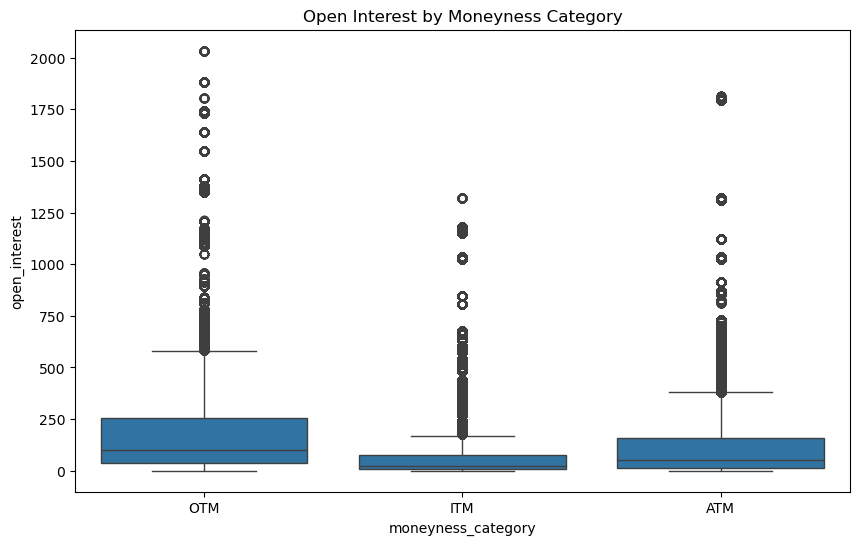

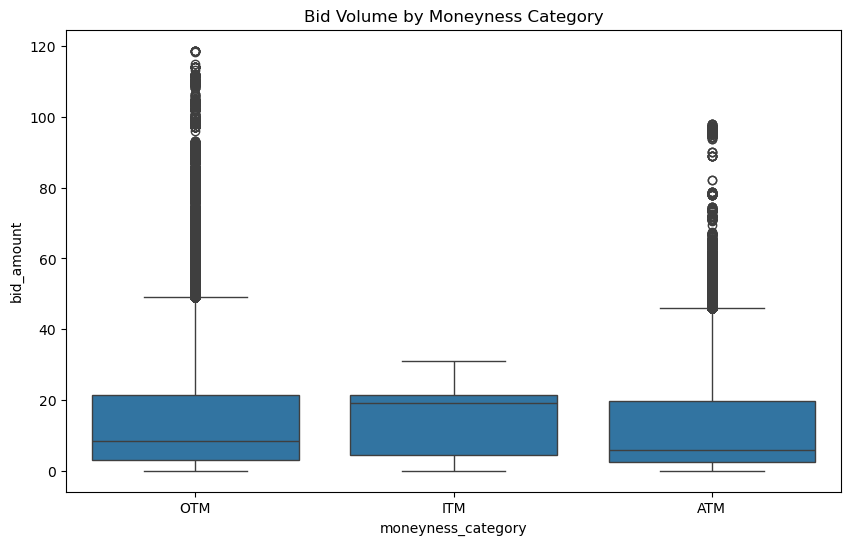

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='moneyness_category', y='open_interest')
plt.title('Open Interest by Moneyness Category')
plt.show()

This suggests traders prefer OTM options, likely due to speculation (lottery-ticket trades) or hedging strategies.
ATM options still have high open interest, but less than OTM.
ITM options have the lowest open interest, meaning they are less traded.

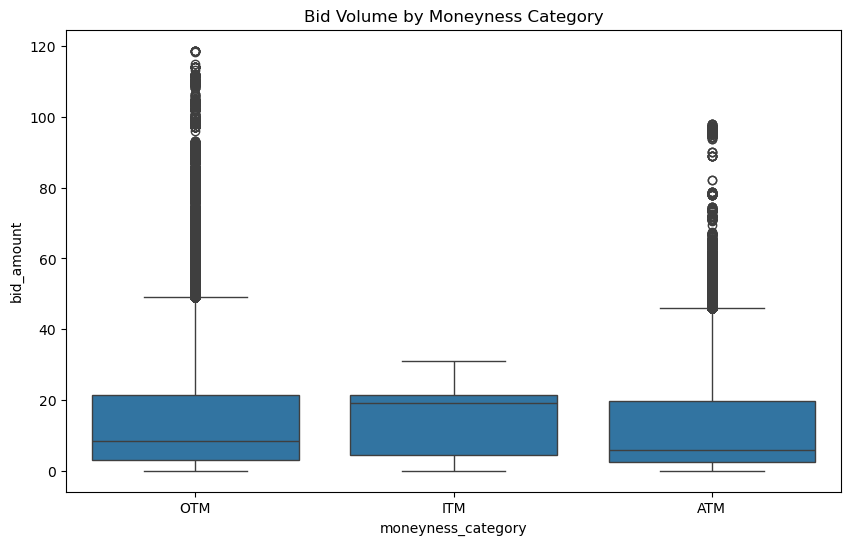

In [17]:

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='moneyness_category', y='bid_amount')
plt.title('Bid Volume by Moneyness Category')
plt.show()

Market demand (reflected in bid size) is similar across ATM, ITM, and OTM.
This suggests that although OTM options have the highest open interest, the actual bid size does not indicate extreme demand differences in short-term liquidity.

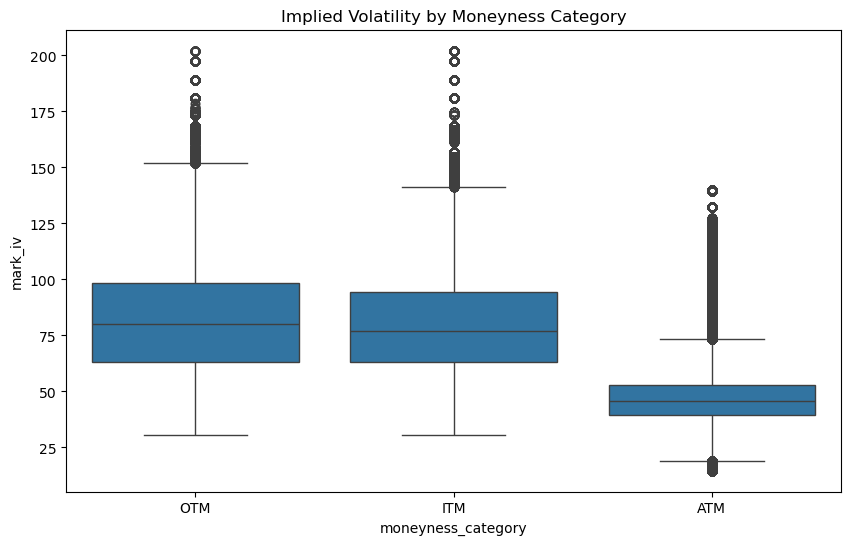

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='moneyness_category', y='mark_iv')
plt.title('Implied Volatility by Moneyness Category')
plt.show()

* OTM options are highly speculative, so their IV is inflated.
* ITM options have intrinsic value, but still some IV due to hedging.
* ATM options are least uncertain (they are at fair value), leading to lower IV.

### Underlying  Price & Mid-Price.

•	How strongly does the mid-price move in response to changes in the underlying?.

•	Compute correlation between mid-price changes and underlying asset price changes.


In [ ]:
merged_df['mid_price_return'] = merged_df['mid_price'].pct_change()
merged_df['underlying_return'] = merged_df['underlying_price'].pct_change()

In [42]:
merged_df['mid_price/underlying_return'] = merged_df['mid_price/underlying'].pct_change()

/scratch-local/talkanbar.10713967/ipykernel_3701105/146810683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['mid_price/underlying_return'] = merged_df['mid_price/underlying'].pct_change()


In [43]:
merged_df['mid_price/underlying_return']

38                 NaN
39            4.250000
40           -0.732601
41           -0.994521
42          112.750000
               ...    
10688699      0.000000
10688700      0.000000
10688701      0.000000
10688702      0.000000
10688703      0.000000
Name: mid_price/underlying_return, Length: 10688654, dtype: float64

In [27]:
merged_df_clean = merged_df.dropna(subset=['mid_price_return', 'underlying_return'])
correlation_overall = merged_df_clean[['mid_price_return', 'underlying_return']].corr().iloc[0, 1]
correlation_overall

-0.0009548525297617849

### Moneyness & Mid-Price

how the relationship between mid-price  and underlying returns (percentage change) varies depending on the moneyness of the options.

•	Does mid-price react differently depending on moneyness?

•	Are ATM options more sensitive to price moves than ITM/OTM?


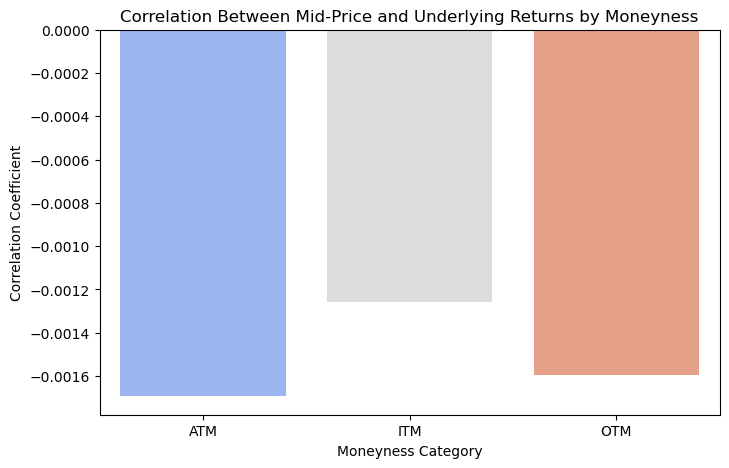

In [26]:

correlation_by_moneyness = merged_df.groupby('moneyness_category').apply(
    lambda g: g['mid_price_return'].corr(g['underlying_return'])
).reset_index(name='correlation')


plt.figure(figsize=(8, 5))
sns.barplot(
    data=correlation_by_moneyness,
    x='moneyness_category',
    y='correlation',
    hue='moneyness_category', 
    palette='coolwarm',  
    legend=False  
)


plt.title('Correlation Between Mid-Price and Underlying Returns by Moneyness')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Moneyness Category')

plt.show()

The small and negative correlation values across the moneyness categories suggest that the changes in the underlying price do not strongly drive the mid-price of the options. ATM options are slightly more sensitive, but the relationship is weak,


### Implied Volatility (IV) & Mid-Price

Do changes in IV (implied volatility) lead to mid-price changes?
Is there an IV skew that affects different moneyness categories?

In [ ]:
# we use those dfs later to visualize many features across various moneyness categories
atm_data = merged_df[merged_df['moneyness_category'] == 'ATM']
itm_data = merged_df[merged_df['moneyness_category'] == 'ITM']
otm_data = merged_df[merged_df['moneyness_category'] == 'OTM']

In [30]:
#more correlations
merged_df['avg_iv'] = (merged_df['bid_iv'] + merged_df['ask_iv']) / 2
ask_iv_mid_price_corr = merged_df[['ask_iv', 'mid_price']].corr().iloc[0, 1]
print(f"Correlation between Ask IV and Mid-Price: {ask_iv_mid_price_corr}")
bid_iv_mid_price_corr = merged_df[['bid_iv', 'mid_price']].corr().iloc[0, 1]
print(f"Correlation between Bid IV and Mid-Price: {bid_iv_mid_price_corr}")
iv_mid_price_corr = merged_df[['avg_iv', 'mid_price']].corr().iloc[0, 1]
print(f"Correlation between IV and Mid-Price: {iv_mid_price_corr}")

Correlation between Ask IV and Mid-Price: 0.7132489436684271
Correlation between Bid IV and Mid-Price: 0.36964858036485276
Correlation between IV and Mid-Price: 0.49467814280900846


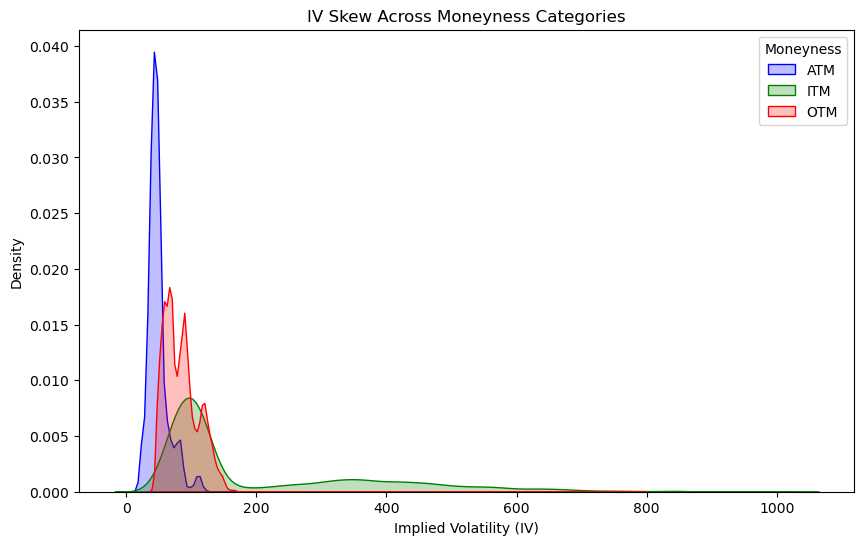

In [29]:
 plt.figure(figsize=(10, 6))

sns.kdeplot(atm_data['avg_iv'], label='ATM', color='blue', fill=True)
sns.kdeplot(itm_data['avg_iv'], label='ITM', color='green', fill=True)
sns.kdeplot(otm_data['avg_iv'], label='OTM', color='red', fill=True)

plt.title('IV Skew Across Moneyness Categories')
plt.xlabel('Implied Volatility (IV)')
plt.ylabel('Density')
plt.legend(title='Moneyness')
plt.show()


* ATM options have low and stable IV (narrow distribution).
* OTM options show higher and more variable IV, with more spread and lower density.
* ITM options show even higher IV, but their distribution is skewed, with a long tail at higher IV levels.

### Greeks (delta, theta, vega, gamma) & mid-price

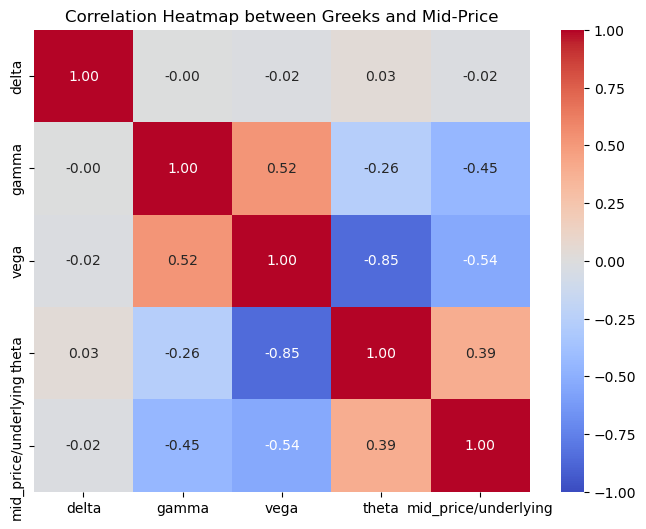

In [7]:

greek_columns = ['delta', 'gamma', 'vega', 'theta', 'mid_price/underlying']
correlation_matrix = merged_df[greek_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Greeks and Mid-Price')
plt.show()

plt.show()


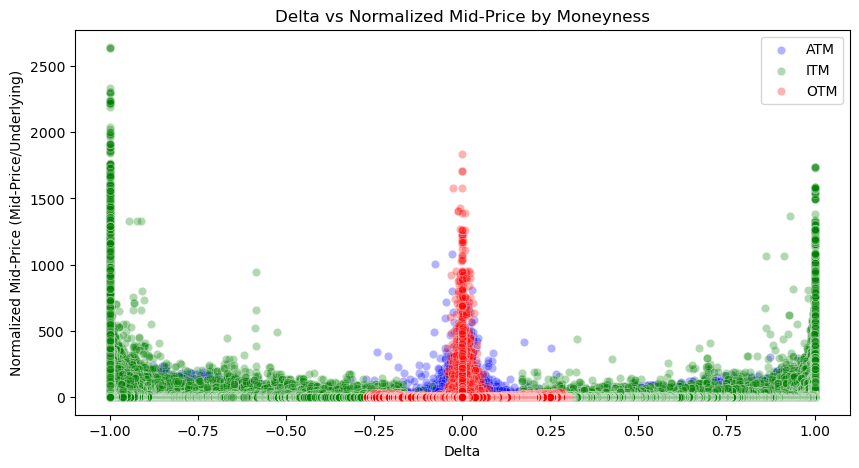

In [40]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=atm_data, x='delta', y='mid_price_return', label='ATM', color='blue', alpha=0.3)
sns.scatterplot(data=itm_data, x='delta', y='mid_price_return', label='ITM', color='green', alpha=0.3)
sns.scatterplot(data=otm_data, x='delta', y='mid_price_return', label='OTM', color='red', alpha=0.3)
plt.title('Delta vs mid_price_return by Moneyness')
plt.xlabel('Delta')
plt.ylabel('mid_price_return')
plt.legend()
plt.show()

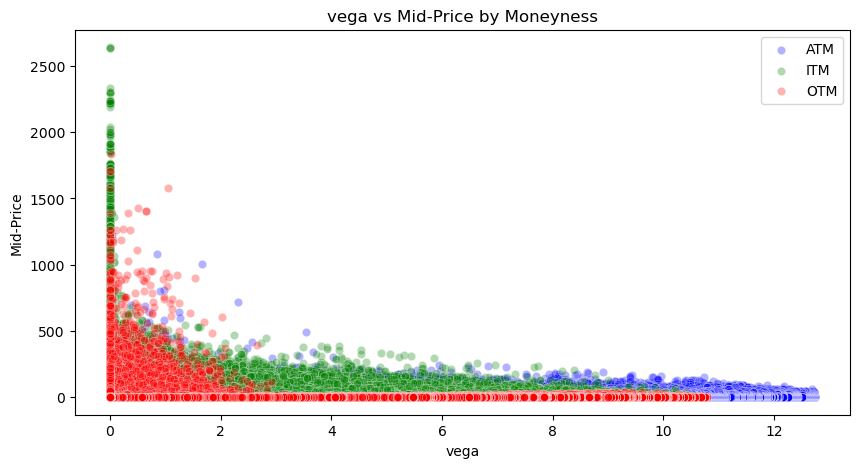

In [49]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=atm_data, x='vega', y='mid_price_return', label='ATM', color='blue', alpha=0.3)
sns.scatterplot(data=itm_data, x='vega', y='mid_price_return', label='ITM', color='green', alpha=0.3)
sns.scatterplot(data=otm_data, x='vega', y='mid_price_return', label='OTM', color='red', alpha=0.3)
plt.title('vega vs Mid-Price by Moneyness')
plt.xlabel('vega')
plt.ylabel('Mid-Price')
plt.legend()
plt.show()

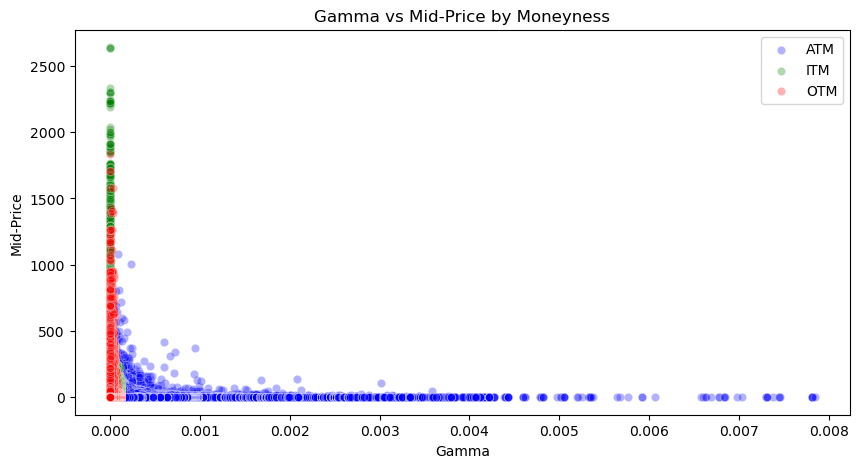

In [51]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=atm_data, x='gamma', y='mid_price_return', label='ATM', color='blue', alpha=0.3)
sns.scatterplot(data=itm_data, x='gamma', y='mid_price_return', label='ITM', color='green', alpha=0.3)
sns.scatterplot(data=otm_data, x='gamma', y='mid_price_return', label='OTM', color='red', alpha=0.3)
plt.title('Gamma vs Mid-Price Return by Moneyness')
plt.xlabel('Gamma')
plt.ylabel('Mid-Price')
plt.legend()
plt.show()

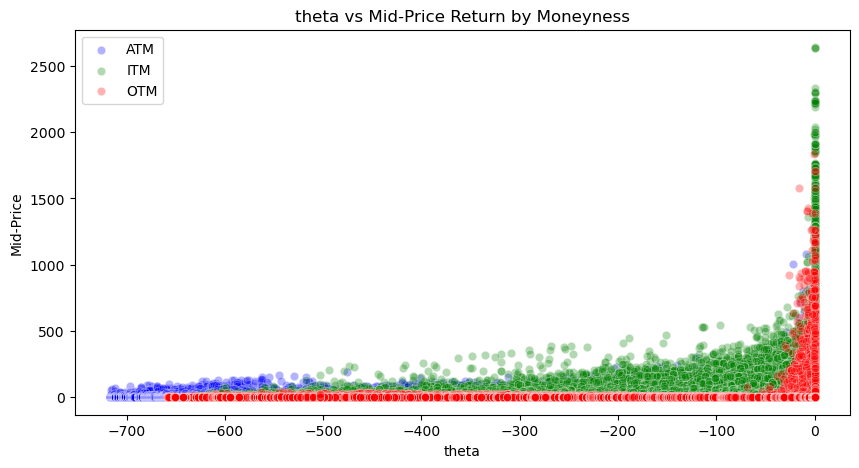

In [10]:


# Plot Delta vs Mid-Price for each moneyness category
plt.figure(figsize=(10, 5))
sns.scatterplot(data=atm_data, x='theta', y='mid_price_return', label='ATM', color='blue', alpha=0.3)
sns.scatterplot(data=itm_data, x='theta', y='mid_price_return', label='ITM', color='green', alpha=0.3)
sns.scatterplot(data=otm_data, x='theta', y='mid_price_return', label='OTM', color='red', alpha=0.3)
plt.title('theta vs Mid-Price Return by Moneyness')
plt.xlabel('theta')
plt.ylabel('Mid-Price')
plt.legend()
plt.show()

### Order Book Depth, Imbalance & mid-price

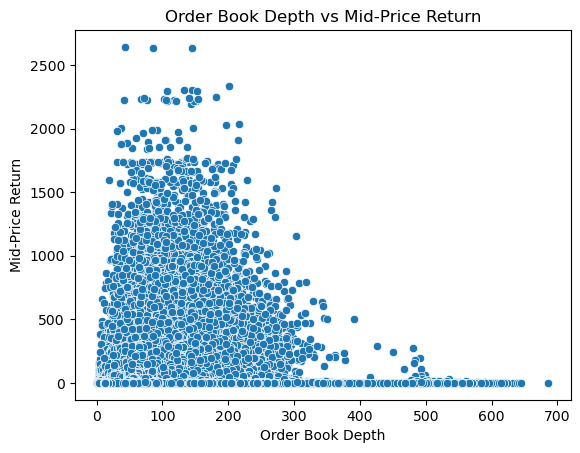

In [44]:
# Scatter plot: Order Book Depth vs Mid-Price Return
sns.scatterplot(data=merged_df, x='order_book_depth', y='mid_price_return')
plt.title('Order Book Depth vs Mid-Price Return')
plt.xlabel('Order Book Depth')
plt.ylabel('Mid-Price Return')
plt.show()


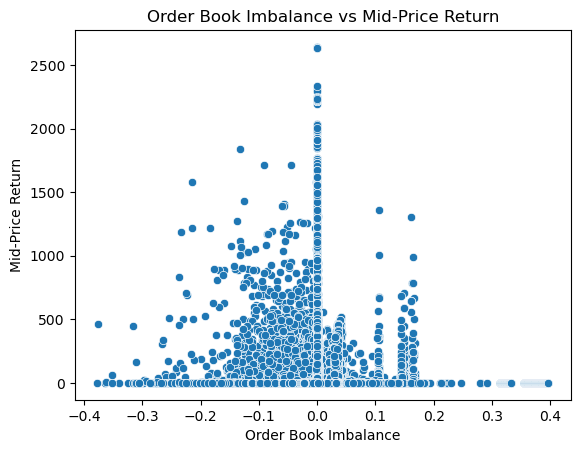

In [45]:
# Scatter plot: Order Book Imbalance vs Mid-Price Return
sns.scatterplot(data=merged_df, x='imbalance', y='mid_price_return')
plt.title('Order Book Imbalance vs Mid-Price Return')
plt.xlabel('Order Book Imbalance')
plt.ylabel('Mid-Price Return')
plt.show()


In [46]:
#  correlation between order book depth and mid-price return
order_book_depth_corr = merged_df[['order_book_depth', 'mid_price_return']].corr()

#  correlation between order book imbalance and mid-price return
imbalance_corr = merged_df[['imbalance', 'mid_price_return']].corr()

print("Correlation between Order Book Depth and Mid-Price Return:")
print(order_book_depth_corr)
print("\nCorrelation between Order Book Imbalance and Mid-Price Return:")
print(imbalance_corr)


Correlation between Order Book Depth and Mid-Price Return:
                  order_book_depth  mid_price_return
order_book_depth          1.000000         -0.023885
mid_price_return         -0.023885          1.000000

Correlation between Order Book Imbalance and Mid-Price Return:
                  imbalance  mid_price_return
imbalance          1.000000         -0.002356
mid_price_return  -0.002356          1.000000


Both order book depth and imbalance appear to have very weak correlations with mid-price returns in your dataset.
These results suggest that liquidity conditions, at least in the form of order book depth and imbalance, might not be strong drivers of mid-price changes.

The bid-ask spread (relative spread) doesn't appear to have a noticeable impact on mid-price changes.

### volatility of the mid-price

To understand volatility of the mid-price we will study the log returns

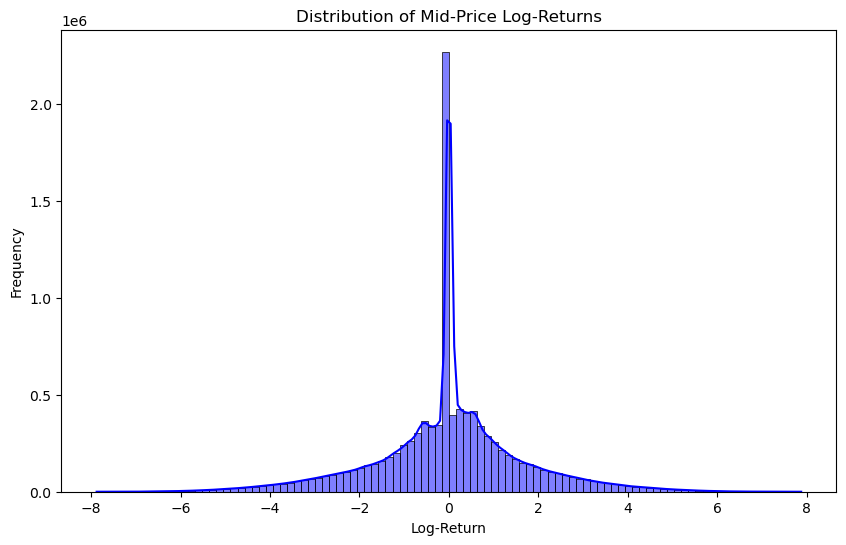

Log-Return Statistics:
count    1.068869e+07
mean    -8.995201e-08
std      1.658993e+00
min     -7.877271e+00
25%     -7.029034e-01
50%      0.000000e+00
75%      7.334211e-01
max      7.879796e+00
Name: mid_price_log_return, dtype: float64


In [48]:
# Compute log-returns for mid-price
merged_df['mid_price_log_return'] = np.log(merged_df['mid_price'] / merged_df['mid_price'].shift(1))


merged_df = merged_df.dropna(subset=['mid_price_log_return'])

# Plot 
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['mid_price_log_return'], bins=100, kde=True, color='blue')
plt.title('Distribution of Mid-Price Log-Returns')
plt.xlabel('Log-Return')
plt.ylabel('Frequency')
plt.show()

# statistics of log-returns
log_return_stats = merged_df['mid_price_log_return'].describe()
print("Log-Return Statistics:")
print(log_return_stats)


### Auto correlation of the mid_price

we can study each symbol alone, but we have hundreds of symbols, so we will aggregate them. We start by studying all options on one day.

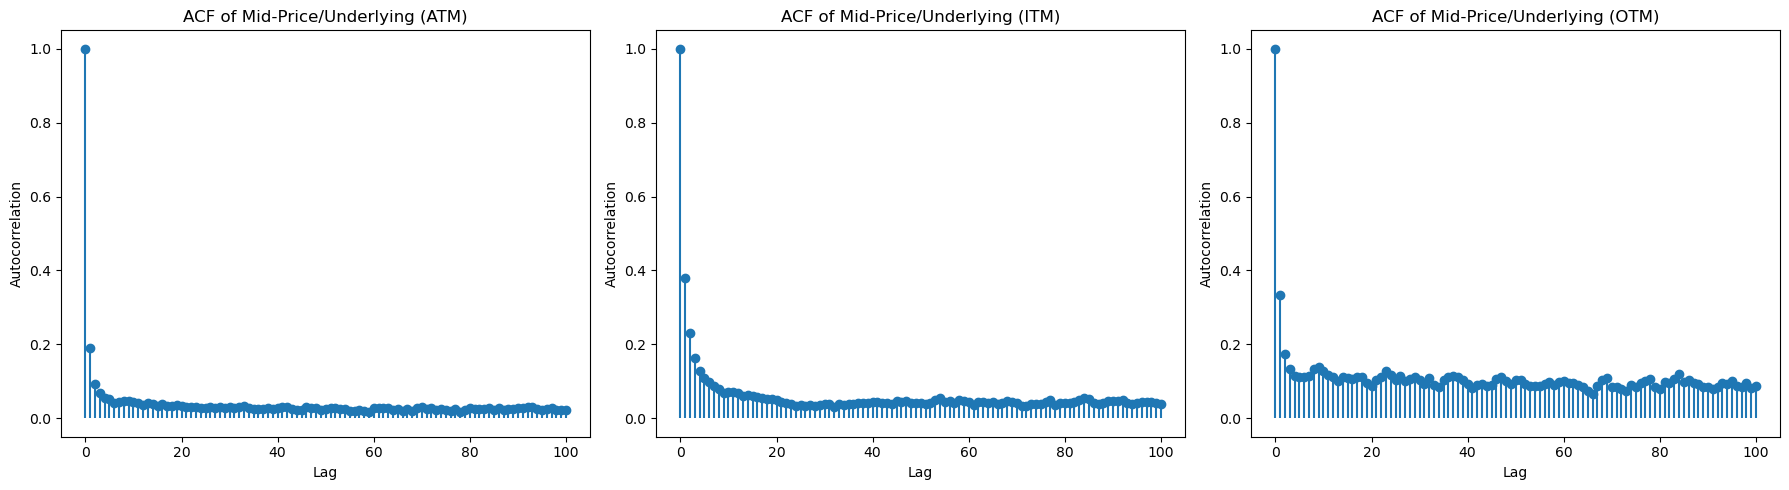

In [68]:
selected_date = "01-02-2025"
filtered_df = merged_df[merged_df['date'] == selected_date]
grouped = filtered_df.groupby(['timestamp', 'moneyness_category'])['mid_price/underlying'].mean().unstack()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
moneyness_categories = ['ATM', 'ITM', 'OTM']

 for i, category in enumerate(moneyness_categories):
    if category in grouped.columns:
        acf_values = acf(grouped[category].dropna(), nlags=100)  
        axes[i].stem(range(len(acf_values)), acf_values, basefmt=" ")
        axes[i].set_title(f"ACF of Mid-Price/Underlying ({category})")
        axes[i].set_xlabel("Lag")
        axes[i].set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()


We can examine acf for the whole dataset per moneyness

# Correlation

Finally we will study correlation between many features. As usual we start first by individual options then we study the global picture.

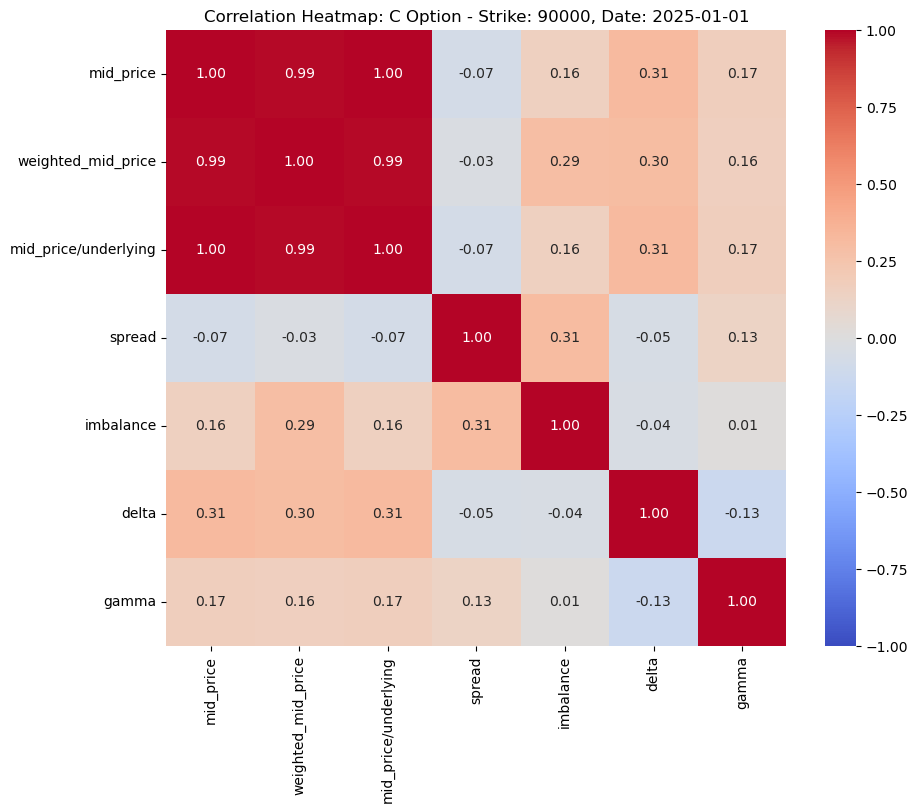

In [16]:
def get_option_correlation(merged_df, date, strike, option_type):

    filtered_df = merged_df[merged_df['date'] == date]
    option_df = filtered_df[(filtered_df['strike'] == strike) & (filtered_df['type'] == option_type)]
    option_df = option_df.sort_values(by='timestamp')
    correlation_columns = ['mid_price', 'weighted_mid_price','mid_price/underlying' ,'spread' ,'imbalance', 'delta', 'gamma']
    correlation_matrix = option_df[correlation_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap: {option_type} Option - Strike: {strike}, Date: {date}')
    plt.show()
    return correlation_matrix



correlation_result = get_option_correlation(merged_df, '2025-01-01', 90000, 'C')



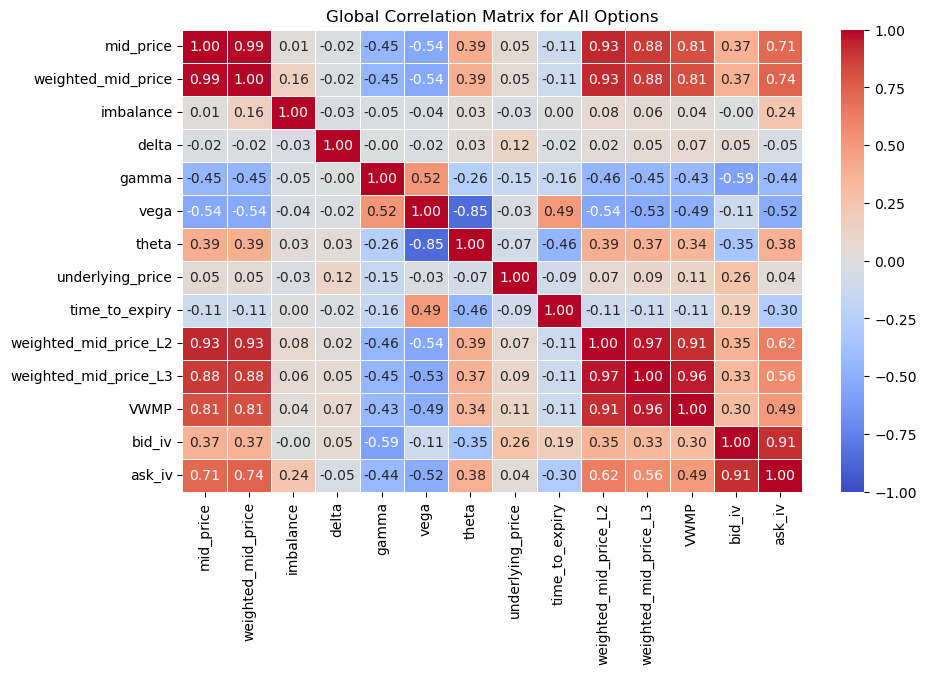

In [21]:

def global_correlation(merged_df):
  
    correlation_columns = ['mid_price', 'weighted_mid_price', 'imbalance', 'delta', 'gamma', 'vega', 'theta','underlying_price','time_to_expiry','weighted_mid_price_L2', 'weighted_mid_price_L3', 'VWMP','bid_iv','ask_iv']
    
    
    correlation_matrix = merged_df[correlation_columns].corr()
    
    return correlation_matrix


def visualize_global_correlation(merged_df):
    
    correlation_matrix = global_correlation(merged_df)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    
    plt.title('Global Correlation Matrix for All Options')
    plt.show()


visualize_global_correlation(merged_df)


saving

In [15]:
folder_path = "/gpfs/home5/talkanbar/"
file_name = "combined_fixed_optimized_df1.pkl"
file_path = os.path.join(folder_path, file_name)
merged_df.to_pickle(file_path)